# Einführung: Personendetektion

Die Verbesserung der Leistung im Bereich Bildverarbeitung möchte ich an einer konkreten Bildverarbeitungsaufgabe aufzeigen: der Personendetektion.

# Datensatz

Hierzu brauchen wir Beispielbilder mit Personen. Einen solchen Datensatz mit Fußgängern gibt es zum Beispiel hier:

Pedestrians Dataset (54 MB, 170 Bilder)<br>
Lizenz: Public Domain<br>
https://www.kaggle.com/datasets/alincijov/penn-fudan


In [1]:
dataset_dir = "/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset/"

In [2]:
!ls -lh $dataset_dir

total 44K
-rw-rw-r-- 1 juebrauer juebrauer 1.6K Jul 21  2020 added-object-list.txt
drwxrwxr-x 2 juebrauer juebrauer  12K Sep 27 12:55 Annotation
drwxrwxr-x 2 juebrauer juebrauer  12K Sep 27 12:55 PedMasks
drwxrwxr-x 2 juebrauer juebrauer  12K Sep 27 12:55 PNGImages
-rw-rw-r-- 1 juebrauer juebrauer 2.4K Jul 21  2020 readme.txt


In [3]:
!ls $dataset_dir/PNGImages

FudanPed00001.png  FudanPed00044.png  PennPed00013.png	PennPed00056.png
FudanPed00002.png  FudanPed00045.png  PennPed00014.png	PennPed00057.png
FudanPed00003.png  FudanPed00046.png  PennPed00015.png	PennPed00058.png
FudanPed00004.png  FudanPed00047.png  PennPed00016.png	PennPed00059.png
FudanPed00005.png  FudanPed00048.png  PennPed00017.png	PennPed00060.png
FudanPed00006.png  FudanPed00049.png  PennPed00018.png	PennPed00061.png
FudanPed00007.png  FudanPed00050.png  PennPed00019.png	PennPed00062.png
FudanPed00008.png  FudanPed00051.png  PennPed00020.png	PennPed00063.png
FudanPed00009.png  FudanPed00052.png  PennPed00021.png	PennPed00064.png
FudanPed00010.png  FudanPed00053.png  PennPed00022.png	PennPed00065.png
FudanPed00011.png  FudanPed00054.png  PennPed00023.png	PennPed00066.png
FudanPed00012.png  FudanPed00055.png  PennPed00024.png	PennPed00067.png
FudanPed00013.png  FudanPed00056.png  PennPed00025.png	PennPed00068.png
FudanPed00014.png  FudanPed00057.png  PennPed00026.png	PennPed00

In [4]:
import os
list_of_image_files = []
for filename in os.listdir(dataset_dir + "PNGImages"):
    #print(filename)
    if ".png" in filename:
        list_of_image_files.append( dataset_dir + "/PNGImages/" + filename )

In [5]:
list_of_image_files[:10]

['/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00052.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00024.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00034.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00014.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00081.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00049.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00088.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00089.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00046.png',
 '/home/juebrauer/link_to_vcd/07_datasets/21_pedestrian_dataset//PNGImages/PennPed00047.png']

# OpenCV / Beispielbilder anzeigen

Wir werden die *OpenCV (Open Computer Vision)* Bibliothek für viele Bildverarbeitungsaufgaben verwenden:

https://opencv.org/

Die aktuelle Version (Stand: 27.09.22) ist 4.6.0.

Die Dokumentation zu dieser Version findet sich hier:

https://docs.opencv.org/4.6.0/

Jetzt benutzen wir sie erstmal um ein paar Bilder zu laden und anzuzeigen:

In [6]:
import cv2

In [7]:
import matplotlib.pyplot as plt

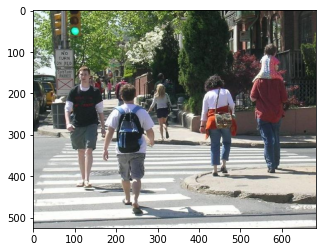

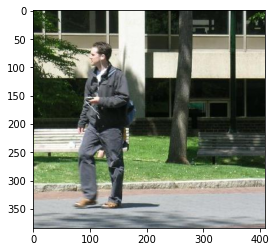

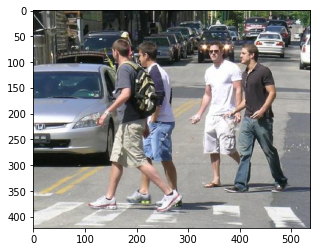

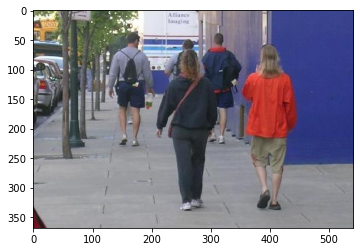

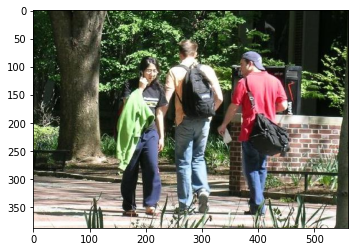

In [8]:
for filename in list_of_image_files[:5]:
    # Achtung!
    # OpenCV speichert Bilder in BGR Reihenfolge
    # Matplotlib erwartet aber RGB Reihenfolge
    img_bgr = cv2.imread( filename )
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow( img_rgb )
    plt.show()

# CV damals (2005): HOGDetector

## Das Paper

Das Originalpaper von der CPVR 2005:

https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf

Stichworte:
- Sliding Window
- Bildpyramide
- Gradienten berechnen
- HOG Deskriptorvektor
- SVM Klassifikator

## Ein Bild einlesen und als Graustufenbild vorbereiten

In [9]:
img_bgr = cv2.imread( list_of_image_files[0] )

In [16]:
type(img_bgr)

numpy.ndarray

Wir haben ein Farbbild, daher hat das NumPy Array 3 Kanäle (Höhe x Breite x Anzahl Kanäle):

In [17]:
img_bgr.shape

(525, 682, 3)

In [18]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

In [19]:
img_gray

array([[251, 247, 250, ...,  91,  43,  45],
       [248, 252, 248, ...,  65,  47,  49],
       [245, 252, 245, ...,  57,  55,  57],
       ...,
       [179, 181, 180, ..., 163, 165, 165],
       [177, 180, 181, ..., 161, 154, 154],
       [176, 180, 182, ..., 153, 162, 162]], dtype=uint8)

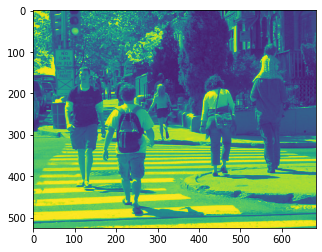

In [20]:
plt.imshow(img_gray)
plt.show()

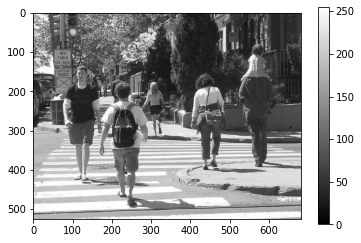

In [21]:
plt.imshow(img_gray, cmap="gray")
plt.colorbar()
plt.show()

## Nach Personen im Bild mit dem HOGDetector suchen

In [22]:
hog = cv2.HOGDescriptor()
print(type(hog))
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

<class 'cv2.HOGDescriptor'>


In [23]:
boxes, weights = hog.detectMultiScale(img_gray, winStride=(8,8) )

In [24]:
boxes

array([[266, 160,  93, 186],
       [398, 238,  89, 177],
       [200, 317,  95, 191],
       [369, 118, 161, 322],
       [ 39, 121, 180, 359],
       [478,  68, 187, 374],
       [163, 218, 149, 296]], dtype=int32)

In [25]:
weights

array([1.26085031, 1.13196816, 0.41723269, 1.93091093, 1.95417769,
       1.2157222 , 1.13536068])

In [26]:
visu = img_gray.copy()
visu = cv2.cvtColor(visu, cv2.COLOR_GRAY2BGR)

In [27]:
visu.shape

(525, 682, 3)

In [28]:
for (x, y, w, h) in boxes:
    cv2.rectangle(visu, (x, y), (x+w, y+h), (0, 255, 0), 2)

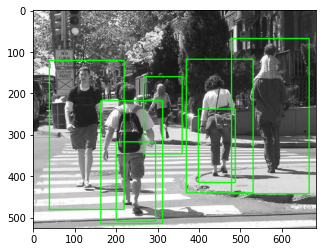

In [29]:
plt.imshow( visu )
plt.show()

## Eine Hilfsfunktion

In [30]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

def detect_pedestrians_with_hog(filename):
    
    # read in image (channel order will be BGR)
    img_bgr = cv2.imread( filename )
        
    # convert BGR to gray-scale image
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    # detect on multiple scales
    boxes, weights = hog.detectMultiScale(img_gray, winStride=(8,8) )
    
    # prepare a copy of the gray-scale image
    visu = img_gray.copy()
    visu = cv2.cvtColor(visu, cv2.COLOR_GRAY2BGR)
    
    # show detected pedestrian bounding boxes
    for (x, y, w, h) in boxes:
        cv2.rectangle(visu, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    # show detections
    plt.imshow( visu )
    plt.show()

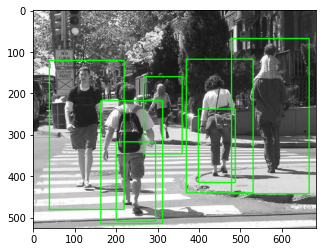

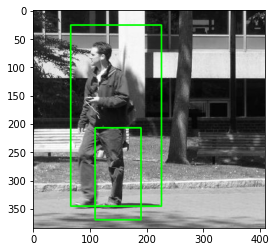

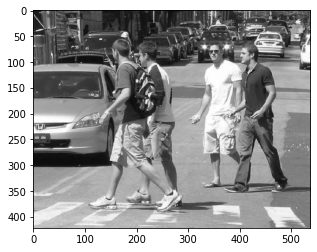

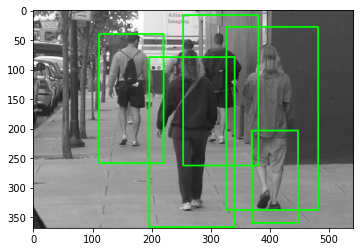

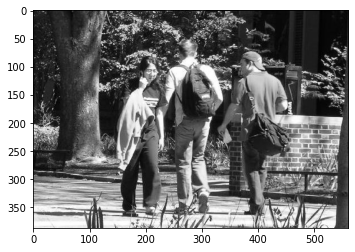

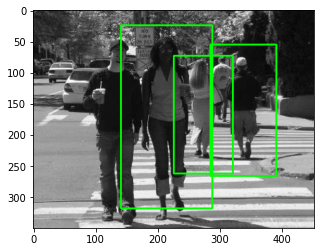

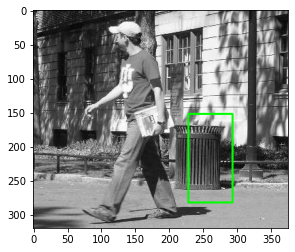

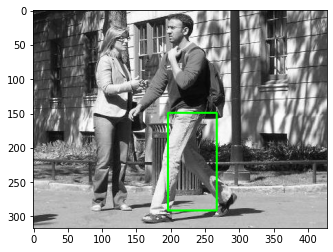

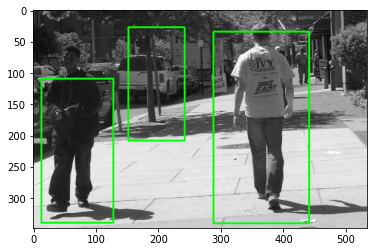

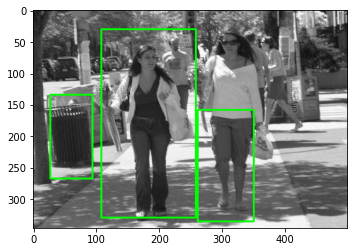

In [31]:
for filename in list_of_image_files[:10]:
    detect_pedestrians_with_hog( filename )

# CV heute (2022): YOLO v5

## Installation von YOLO V5

Wird hier beschrieben:

https://github.com/ultralytics/yolov5

Sind nur 3 Befehle:

    git clone https://github.com/ultralytics/yolov5  # clone
    cd yolov5
    pip install -r requirements.txt  # install
    
Toll, dass es sich so einfach installieren lässt.

Die einfache Verwendung ist auch ein Kernaspekt hinter der Firma

https://ultralytics.com/<br>
[Werbevideo "Inside Ultralytics"](https://www.youtube.com/watch?v=Zgi9g1ksQHc)

## Ein erster Test, ob wir YOLO nun verwenden können

In [43]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# Images
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.show()

Using cache found in /home/juebrauer/.cache/torch/hub/ultralytics_yolov5_master
requirements: YOLOv5 requirement "torchvision>=0.8.1" not found, attempting AutoUpdate...

requirements: 1 package updated per /home/juebrauer/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-9-28 Python-3.8.10 torch-1.12.1+cu102 CUDA:0 (Quadro P5200 with Max-Q Design, 16279MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 353.8ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


## Welche Modelle sind überhaupt verfügbar?

Siehe diese Tabelle:

https://github.com/ultralytics/yolov5#pretrained-checkpoints

## Wie kommt man an die Detektionsbounding-Boxen?

In [44]:
results.xyxy[0]

tensor([[7.43291e+02, 4.83438e+01, 1.14176e+03, 7.20000e+02, 8.79860e-01, 0.00000e+00],
        [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
        [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66694e-01, 0.00000e+00],
        [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]], device='cuda:0')

Eine Erklärung über die Werte findet man hier:

https://github.com/ultralytics/yolov5/issues/388

    #          x1 (pixels)  y1 (pixels)  x2 (pixels)  y2 (pixels)   confidence        class
    # tensor([[7.47613e+02, 4.01168e+01, 1.14978e+03, 7.12016e+02, 8.71210e-01, 0.00000e+00],
    #         [1.17464e+02, 1.96875e+02, 1.00145e+03, 7.11802e+02, 8.08795e-01, 0.00000e+00],
    #         [4.23969e+02, 4.30401e+02, 5.16833e+02, 7.20000e+02, 7.77376e-01, 2.70000e+01],
    #         [9.81310e+02, 3.10712e+02, 1.03111e+03, 4.19273e+02, 2.86850e-01, 2.70000e+01]])

In [45]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,743.290588,48.343811,1141.756592,720.000000,0.879860,0,person
1,441.989624,437.336670,496.585083,710.036255,0.675119,27,tie
2,123.051056,193.238037,714.690674,719.771301,0.666694,0,person
3,978.989807,313.579468,1025.302856,415.526184,0.261517,27,tie


## Ein YOLO v5 Modell auf unseren Testbildern testen

TODO!